### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Sales.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
## Data do not contain any null or missing values.

In [8]:
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


In [9]:
## Data do not contain any duplicate values

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### visualization 

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

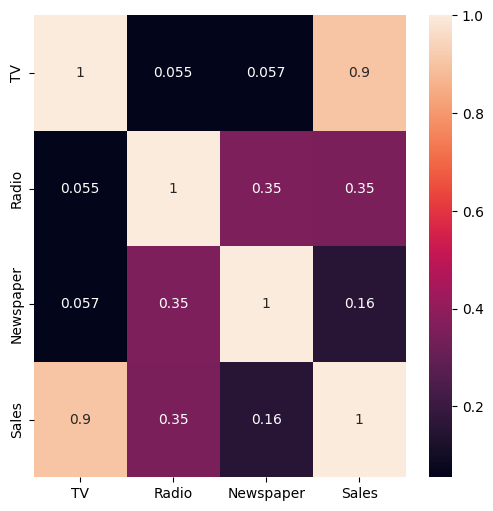

In [12]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Sales VS TV')

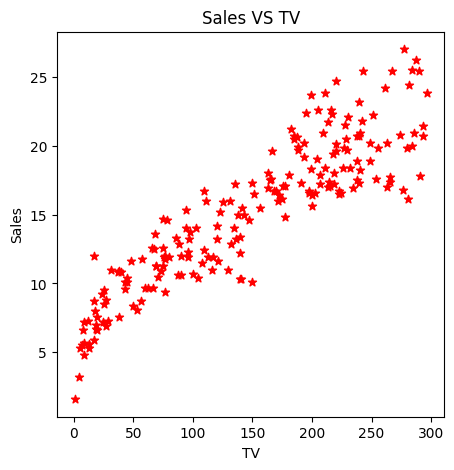

In [13]:
## Sales VS TV

plt.figure(figsize = (5,5))
plt.scatter(df.TV,df.Sales,marker = "*",color = "red")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales VS TV")

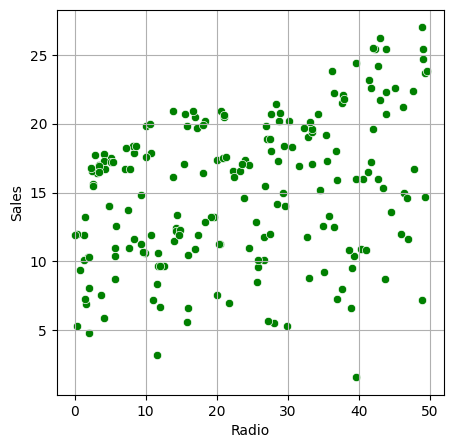

In [16]:
## Sales VS Radio
plt.figure(figsize = (5,5))
sns.scatterplot(data = df, x = "Radio", y = "Sales",color = "green")
plt.grid()

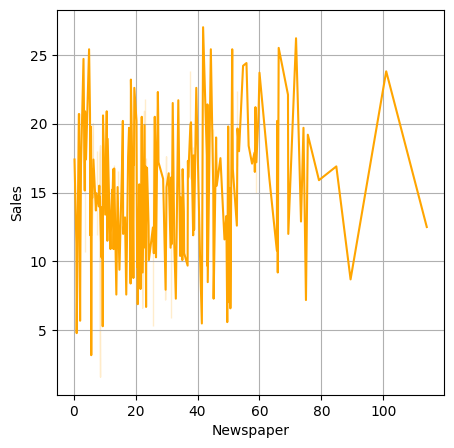

In [17]:
## Sales Vs Newspaper

plt.figure(figsize = (5,5))
sns.lineplot(data = df, x = "Newspaper", y= "Sales", color = "orange")
plt.grid()

<Axes: xlabel='Sales', ylabel='Density'>

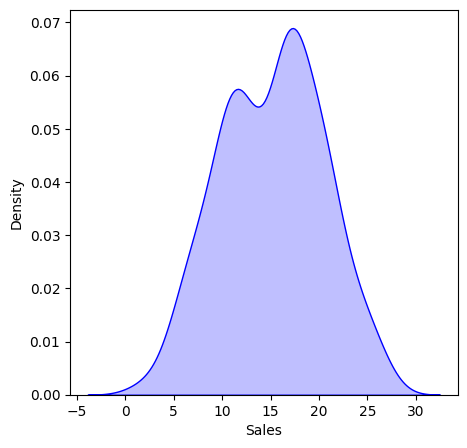

In [20]:
### Sales distribution

plt.figure(figsize = (5,5))
sns.kdeplot(df.Sales,color = "blue",shade = True)

#### Splitting of the data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop("Sales",axis = 1)
y = df.Sales

In [23]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 3)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 3), (30, 3), (170,), (30,))

In [32]:
#### Preprocessing

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

#### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
r2_score(y_test,y_pred)

0.9315005997120429

In [39]:
mean_squared_error(y_test,y_pred)

1.5804950349929567

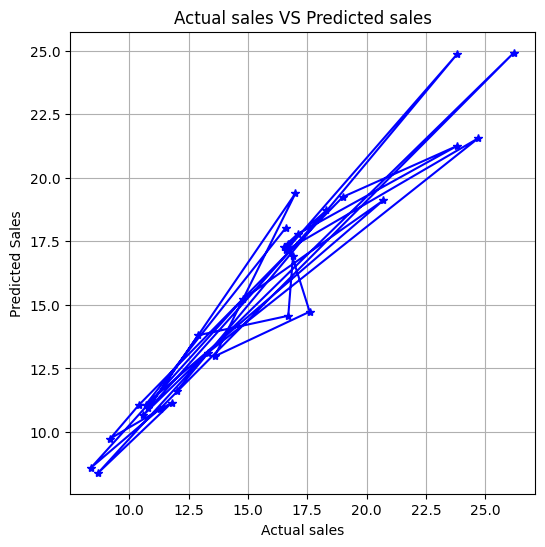

In [40]:
## Actual VS Predicted

plt.figure(figsize = (6,6))
plt.plot(y_test,y_pred,marker = "*", color = "blue")
plt.xlabel("Actual sales")
plt.ylabel("Predicted Sales")
plt.title("Actual sales VS Predicted sales")
plt.grid()

In [59]:
### TESTING THE MODEL 
test_data = {
    "TV" : 100.18,
    "Radio" : 35.19,
    "Newspaper" : 196.80
}

data = pd.DataFrame([test_data])

In [60]:
data

,TV,Radio,Newspaper
0,100.18,35.19,196.8


In [61]:
model.predict(data)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.